<a href="https://www.kaggle.com/code/dataranch/pediatric-appendicitis-classification-eda?scriptVersionId=216990142" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pediatric Appendicitis Classification using the Regensburg Dataset - EDA

- This project focuses on developing a machine learning model to assist in the diagnosis of appendicitis in pediatric patients using the Regensburg Pediatric Appendicitis dataset. The main goal is to create a reliable classification model that can help identify appendicitis cases based on clinical, laboratory, and ultrasound findings.
- This is the EDA portion

### Dataset Description
- **Source**: Children's Hospital St. Hedwig in Regensburg, Germany (2016-2021)
- **Size**: 782 patients
- **Features**: 53 variables including:
  - Clinical measurements (e.g., Age, BMI, Body Temperature)
  - Laboratory findings (e.g., WBC Count, CRP, Neutrophil Percentage)
  - Physical examination results (e.g., Migratory Pain, Rebound Tenderness)
  - Clinical scoring systems (Alvarado Score, Pediatric Appendicitis Score)
  - Ultrasound findings
- **Target Variables**: 
  - Primary: Diagnosis (appendicitis vs. no appendicitis)
  - Secondary: Management (surgical vs. conservative)
  - Tertiary: Severity (complicated vs. uncomplicated/no appendicitis)



https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis

In [1]:
# imports needed for milestone 1
import pandas as pd
import matplotlib.pyplot as plt
# better looking plots
import seaborn as sns

In [2]:
df = pd.read_excel('/kaggle/input/childrens-hospital-regensburg-appendicitis/app_data.xlsx')
# this is so i can view the data locally
# df.to_csv('app_data.csv', index=False)

- Let's take a look at the first few rows...

In [3]:
df.head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
5,11.05,30.7,male,121.0,45.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.98,19.4,female,140.0,38.5,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.06,NaN,female,NaN,21.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
8,7.90,15.7,male,131.0,26.7,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
9,14.34,14.9,male,174.0,45.5,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We see we have 57 features.
- From the first 10 rows, we can see a missing value in the 'Height' column, so we'll need to investigate further.
    - Missing values in many columns as we look to the right side of the df.
- The target column in this case is 'Diagnosis' which is a binary column with values 'Appendicitis' and 'No appendicitis'
    - We'll need to convert this and other categorical variables to a binary format for our model.

In [4]:
len(df)

782

- 782 instances

- Before computing any statistics, we need to isolate the numerical columns and check for missing values.

In [5]:
# isolate the numeric features
numerical_features = df.select_dtypes(include=['float64']).columns

In [6]:
df[numerical_features].head()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
0,12.68,16.9,148.0,37.0,3.0,4.0,3.0,7.1,37.0,7.7,68.2,NaN,5.27,14.8,12.2,254.0,0.0,882.0
1,14.10,31.9,147.0,69.5,2.0,5.0,4.0,NaN,36.9,8.1,64.8,NaN,5.26,15.7,12.7,151.0,3.0,883.0
2,14.14,23.3,163.0,62.0,4.0,5.0,3.0,NaN,36.6,13.2,74.8,NaN,3.98,11.4,12.2,300.0,3.0,884.0
3,16.37,20.6,165.0,56.0,3.0,7.0,6.0,NaN,36.0,11.4,63.0,NaN,4.64,13.6,13.2,258.0,0.0,886.0
4,11.08,16.9,163.0,45.0,3.0,5.0,6.0,7.0,36.9,8.1,44.0,NaN,4.44,12.6,13.6,311.0,0.0,887.0


In [7]:
df[numerical_features].isna().sum()

Age                                1
BMI                               27
Height                            26
Weight                             3
Length_of_Stay                     4
Alvarado_Score                    52
Paedriatic_Appendicitis_Score     52
Appendix_Diameter                284
Body_Temperature                   7
WBC_Count                          6
Neutrophil_Percentage            103
Segmented_Neutrophils            728
RBC_Count                         18
Hemoglobin                        18
RDW                               26
Thrombocyte_Count                 18
CRP                               11
US_Number                         22
dtype: int64

- For these numeric columns, let's use a median imputation strategy to fill in the missing values. Given that there's less than 800 entries in the dataset, we don't want to drop any rows if we can avoid it. 

- Median imputation might be problematic for Segmented_Neutrophils and Appendix_Diameter, as they have a high percentage of missing values. We'll need to keep this in mind and may need to revisit this problem in the future.

In [8]:
#suppress warnings
import warnings
warnings.filterwarnings("ignore")
for column in numerical_features:
    if df[column].isnull().sum() > 0:
        #calculate median of column
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

- Let's check and make sure there are no missing values in the numerical columns.

In [9]:
df[numerical_features].isna().sum()

Age                              0
BMI                              0
Height                           0
Weight                           0
Length_of_Stay                   0
Alvarado_Score                   0
Paedriatic_Appendicitis_Score    0
Appendix_Diameter                0
Body_Temperature                 0
WBC_Count                        0
Neutrophil_Percentage            0
Segmented_Neutrophils            0
RBC_Count                        0
Hemoglobin                       0
RDW                              0
Thrombocyte_Count                0
CRP                              0
US_Number                        0
dtype: int64

- Perfect! Let's dig into the statistics of these numerical columns.

In [10]:
df[numerical_features].describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,11.346601,18.877753,148.071739,43.165742,4.277494,5.927110,5.236573,7.667263,37.402685,12.665537,72.279668,64.529668,4.799041,13.378645,13.164322,285.039642,31.044847,424.755754
std,3.527720,4.311546,19.403000,17.357896,2.569092,2.083053,1.893189,2.027507,0.899825,5.346191,13.534515,3.931203,0.493237,1.377175,4.463417,71.667551,57.100060,267.770056
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.209377,15.804082,138.000000,29.500000,3.000000,4.000000,4.000000,7.000000,36.800000,8.300000,63.825000,64.500000,4.540000,12.700000,12.300000,236.000000,1.000000,204.250000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.080082,21.014438,162.225000,54.000000,5.000000,8.000000,6.000000,8.000000,37.900000,16.200000,82.375000,64.500000,5.010000,14.000000,13.300000,328.750000,32.000000,603.750000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


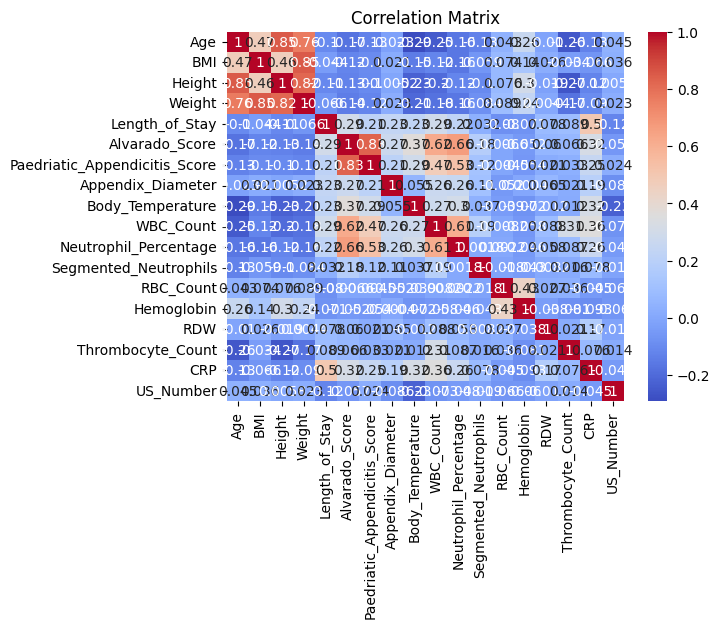

In [11]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- That's a lot of information! Let's focus on a few key statistics for now.

In [12]:
numerical_features


Index(['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_Diameter',
       'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage',
       'Segmented_Neutrophils', 'RBC_Count', 'Hemoglobin', 'RDW',
       'Thrombocyte_Count', 'CRP', 'US_Number'],
      dtype='object')

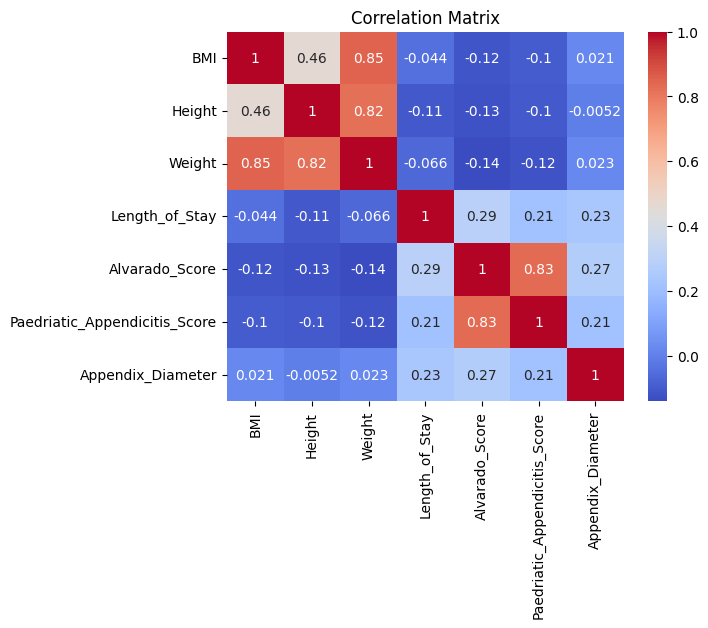

In [13]:
subset = numerical_features[1:8]
sns.heatmap(df[subset].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- From this subset, we can see the following features are highly correlated
- Height and Weight
- BMI and Weight
- BMI and Height
- Alvarado Score and Pediatric Appendicitis Score are slightly correlated

- We may consider dropping one of the highly correlated features to reduce multicollinearity in the model. This is similar to a PCA analysis where we want to reduce the number of features to the most important ones.

In [14]:
subset

Index(['BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_Diameter'],
      dtype='object')

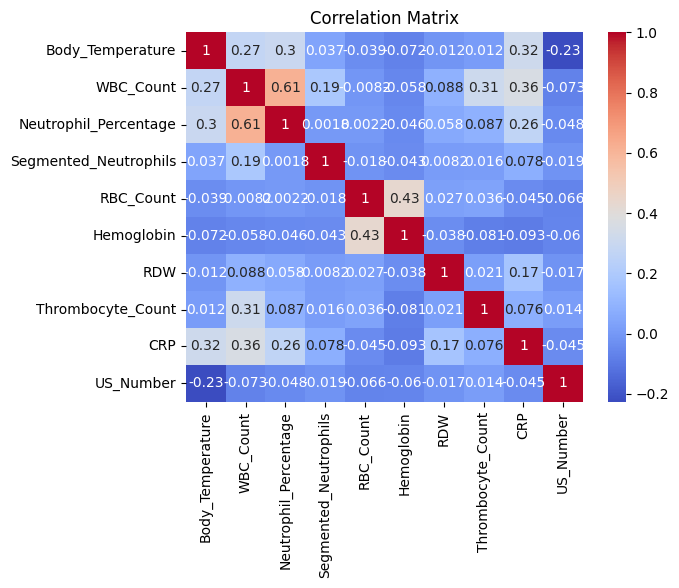

In [15]:
subset = numerical_features[8:]
sns.heatmap(df[subset].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- The highly correlated features here are:
    - RBC_Count and Hemoglobin
    - WBC_Count and Neutrophil_Percentage

# Distributions

- Let's check out the distribution of some of these features.
    - For breviety, we'll focus on a few features here.

<Axes: xlabel='BMI', ylabel='Count'>

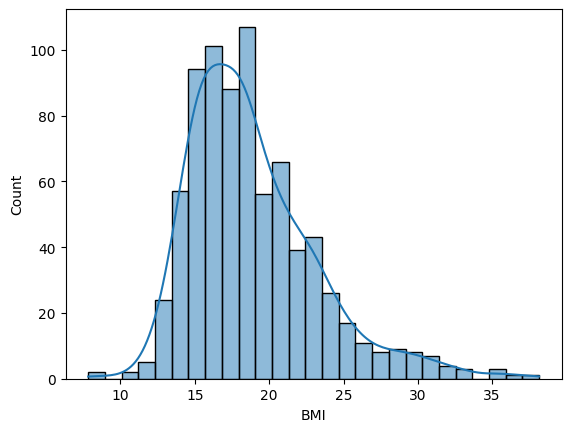

In [16]:
sns.histplot(df['BMI'], kde=True)

- BMI has a normal distribution with a slight right skew.
- Median BMI is around 17

<Axes: xlabel='Height', ylabel='Count'>

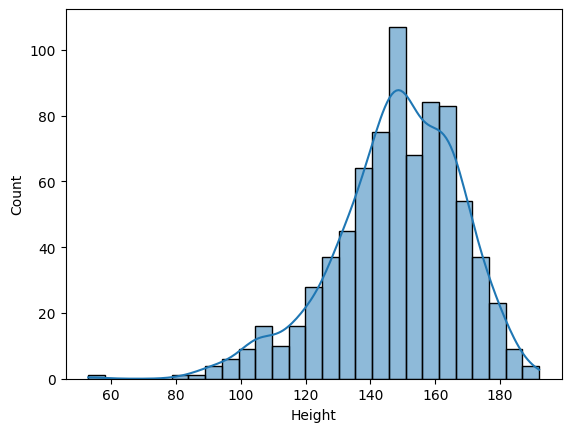

In [17]:
sns.histplot(df['Height'], kde=True)

- Height has a normal distribution with a left skew.
- Median height is around 150
    - One height is around 50-60
        - Although this is an outlier, we'll keep it for now as it may be a valid entry.

<Axes: xlabel='Weight', ylabel='Count'>

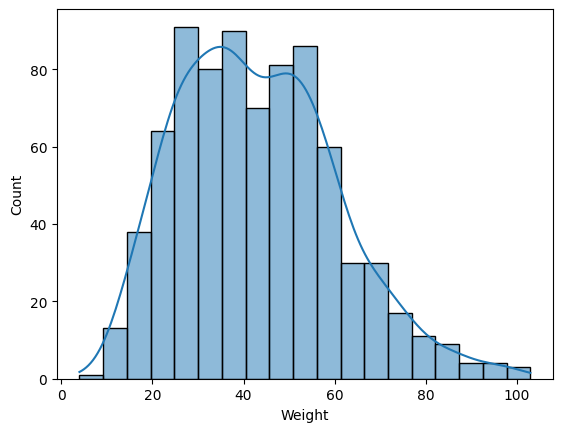

In [18]:
sns.histplot(df['Weight'], kde=True)

- Let's see how alvarado score is related to the diagnosis of appendicitis.

Text(0.5, 1.0, 'Alvarado Score by Diagnosis')

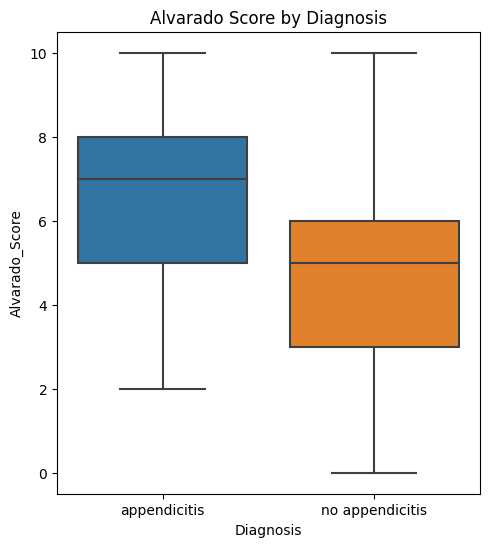

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Diagnosis', y='Alvarado_Score')
plt.title('Alvarado Score by Diagnosis')

- Cases with appendicitis have a higher median alvarado score (7) than those without appendicitis (5).

- Let's do the same for the pediatric appendicitis score.

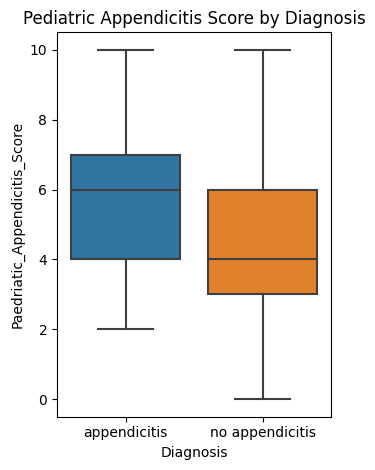

In [20]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Diagnosis', y='Paedriatic_Appendicitis_Score')
plt.title('Pediatric Appendicitis Score by Diagnosis')
plt.tight_layout()

- Similar to the alvarado score, cases with appendicitis have a higher median pediatric appendicitis score (6) than those without appendicitis (4).

- Let's convert the target column to a binary column with values 0 and 1

In [21]:
#encode appendicitis as 1 and no appendicitis as 0
#df['Diagnosis'] = df['Diagnosis'].map({'Appendicitis': 1, 'No Appendicitis': 0})
# we'll do the same for severity
#df['Severity'] = df['Severity'].map({'complicated': 1, 'uncomplicated': 0})
#df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

- The following columns are sparse and categorical, let's drop them for now and maybe revisit them later.

In [22]:
sparse_columns = [
    "Appendix_Wall_Layers", "Target_Sign", "Appendicolith", "Perfusion", 
    "Perforation", "Surrounding_Tissue_Reaction", "Appendicular_Abscess", 
    "Abscess_Location", "Pathological_Lymph_Nodes", "Lymph_Nodes_Location", 
    "Bowel_Wall_Thickening", "Conglomerate_of_Bowel_Loops", "Ileus", 
    "Coprostasis", "Meteorism", "Enteritis", "Gynecological_Findings"
]
# we would then drop these columns or handle them in a different way
# not going to drop them for now

- Let's sum up the symptoms across all columns so that for each entry, we know how many symptoms they have.

In [23]:
symptom_columns = [
    'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
    'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Dysuria',
    'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness'
]
df['symptom_count'] = df[symptom_columns].apply(lambda x: (x == 'yes').sum(), axis=1)
df['symptom_count']

0      4
1      6
2      3
3      6
4      6
      ..
777    5
778    2
779    2
780    5
781    1
Name: symptom_count, Length: 782, dtype: int64

- It seems like more symtoms should be indicative of appendicitis, but let's check the distribution of symptoms for appendicitis vs. no appendicitis.

Text(0.5, 1.0, 'Symptom Count by Diagnosis')

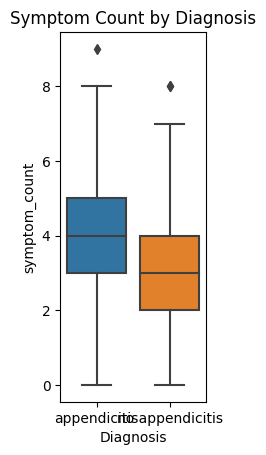

In [24]:
plt.subplot(1, 3, 1)
sns.boxplot(x='Diagnosis', y='symptom_count', data=df)
plt.title('Symptom Count by Diagnosis')

- Yep! Cases with appendicitis have more symptoms on average than those without appendicitis.

- Let's use some of the key lab values to create interaction terms.
- These are key inflammatory markers that doctors use to diagnose appendicitis
    - WBC (White Blood Cell) count indicates acute infection/inflammation
    - CRP (C-Reactive Protein) is another inflammatory marker
    - Neutrophils are the type of white blood cells that respond to bacterial infections.
- The idea is these interaction terms can capture where these inflammatory markers are high together.

In [25]:
df['WBC_CRP_Interaction'] = df['WBC_Count'] * df['CRP']
df['WBC_Neutrophil_Interaction'] = df['WBC_Count'] * df['Neutrophil_Percentage']
df['CRP_Neutrophil_Interaction'] = df['CRP'] * df['Neutrophil_Percentage']

- Let's see how these interaction terms are related to the diagnosis of appendicitis.
- We'll use boxplots to visualize this relationship.

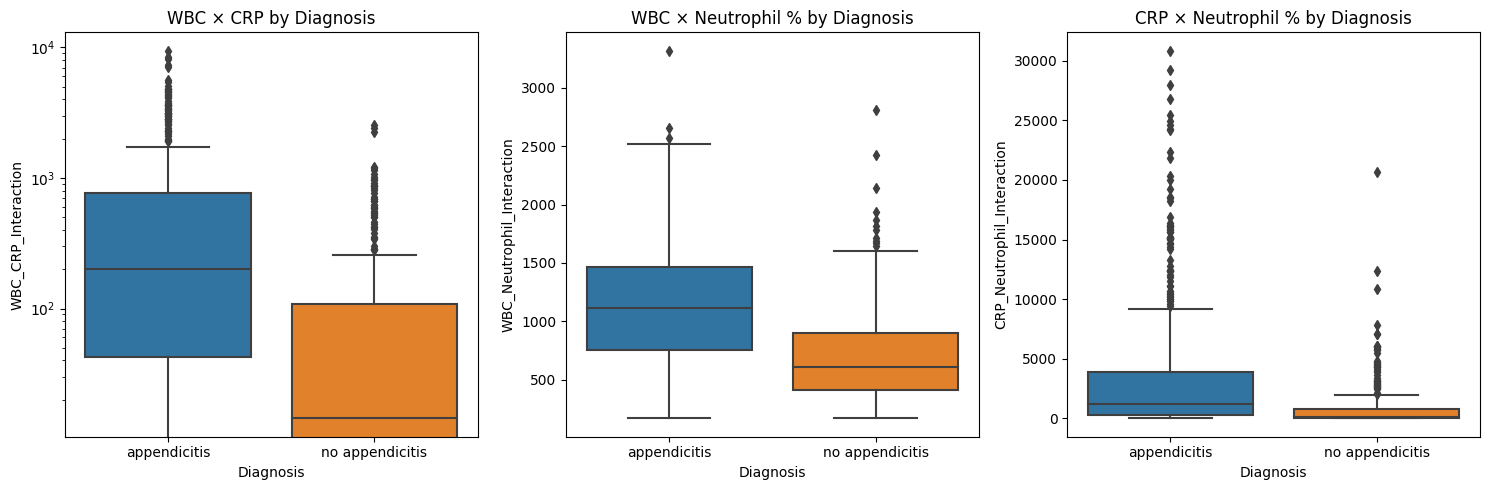

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Diagnosis', y='WBC_CRP_Interaction', data=df)
plt.title('WBC × CRP by Diagnosis')
plt.yscale('log')  #needed for large range of values


plt.subplot(1, 3, 2)
sns.boxplot(x='Diagnosis', y='WBC_Neutrophil_Interaction', data=df)
plt.title('WBC × Neutrophil % by Diagnosis')

plt.subplot(1, 3, 3)
sns.boxplot(x='Diagnosis', y='CRP_Neutrophil_Interaction', data=df)
plt.title('CRP × Neutrophil % by Diagnosis')

plt.tight_layout()
plt.show()

- For two interaction terms, cases with appendicitis have higher median values than those without appendicitis.
    - CRP * Neutrophil Percentage seems to have a similar/lower median value for appendicitis cases compared to no appendicitis cases.
- Maybe these interaction terms will be useful for our model(s).

- Just out of curiosity, let's see how these interaction terms are correlated with some of the original numerical features.

Text(0.5, 1.0, 'Correlation Matrix')

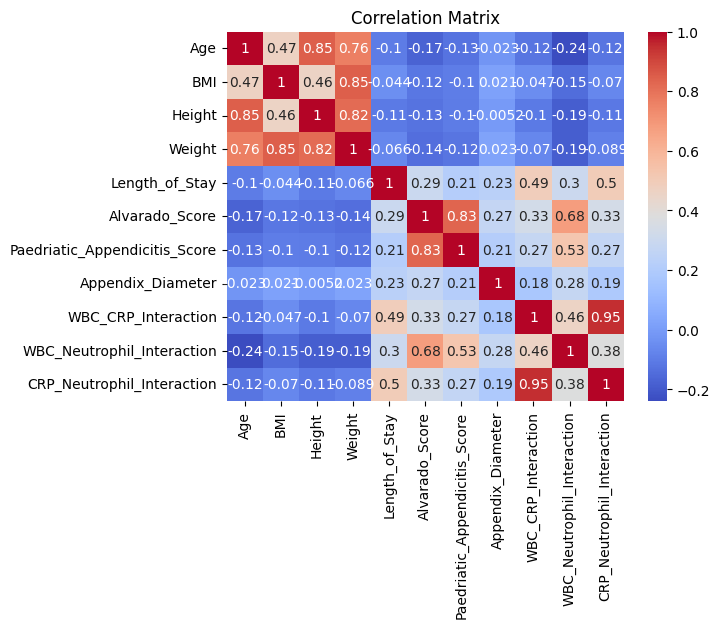

In [27]:
# correlation plot with the new features and the orinal numerical features
new_features = ['WBC_CRP_Interaction', 'WBC_Neutrophil_Interaction', 'CRP_Neutrophil_Interaction']
features = numerical_features.tolist()[0:8] + new_features
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

- We can see the WBC_Neutrophil interaction term is highly correlated with the Alvarado Score and Pediatric Appendicitis Score.
- These scores are indicative of appendicitis, so maybe this interaction term alone can be a good predictor of appendicitis.